# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'becker': {'filename': 'beckerestimation_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'mean_pre_discussion_error',
   'mean_post_discussion_error',
   'mean_pre_discussion_error_pct',
   'mean_post_discussion_error_pct',
   'question',
   'chatrooms',
   'trial_indx']},
 'csop': {'filename': 'csop_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'round_num',
   'round_index',
   'task_index',
   'complexity',
   'type',
   'social_perceptiveness',
   'skill',
   'normalized_score',
   'zscore_score',
   'zscore_round_duration',
   'zscore_efficiency']},
 'csopII': {'filename': 'csopII_output_conversation_level.csv',
  'cols_to_ignore': ['conversation_num',
   'batch_num',
   'vis_img',
   'int_verb',
   'ort_img',
   'rep_man',
   'soc_pers',
   'team_size',
   'difficulty',
   'score',
   'duration',
   'efficiency',
   'timestamp']},
 'dat': {'filename': 'DAT_output_conversation_level.csv',
  'cols_to_ignore':

# Multi-Task Joint Model

### Joint Model (standardizing features _across_ tasks)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4634	MAE: 0.484	MSE: 0.545	RMSE: 0.7382
Validation Set:	R2: 0.1731	MAE: 0.6607	MSE: 0.7732	RMSE: 0.8793


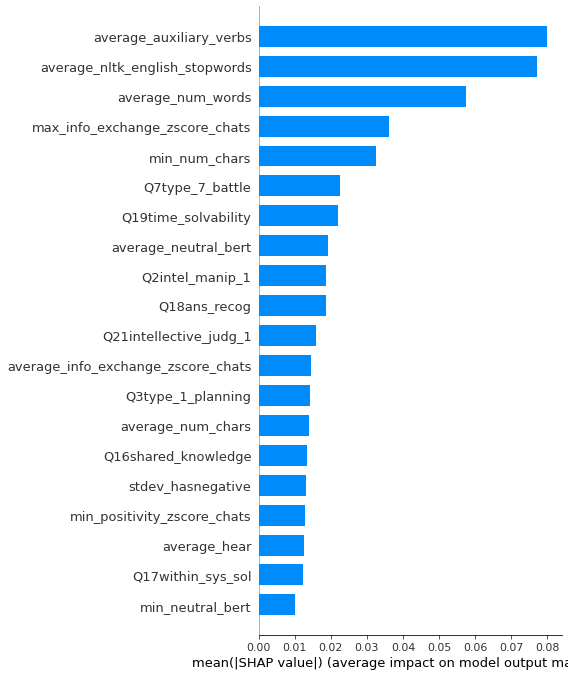

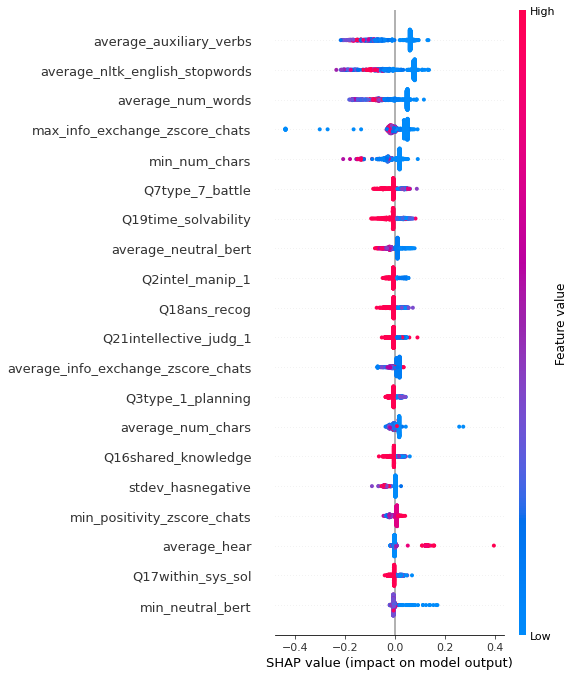

In [3]:
joint_model = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"])
joint_model.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])
joint_model.define_model(model_type = 'rf')
joint_model.evaluate_model(joint_model.baseline_model, val_size = 0.2, test_size = None)

80% data

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4643	MAE: 0.484	MSE: 0.544	RMSE: 0.7376
Validation Set:	R2: 0.1506	MAE: 0.6755	MSE: 0.7943	RMSE: 0.8912


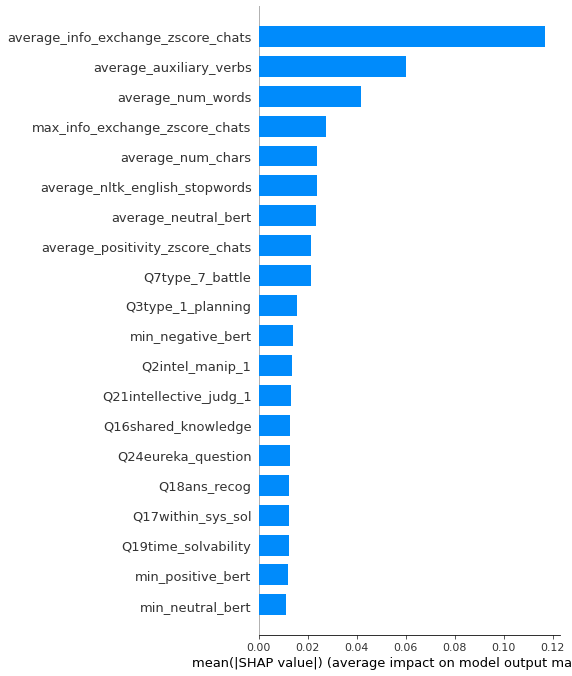

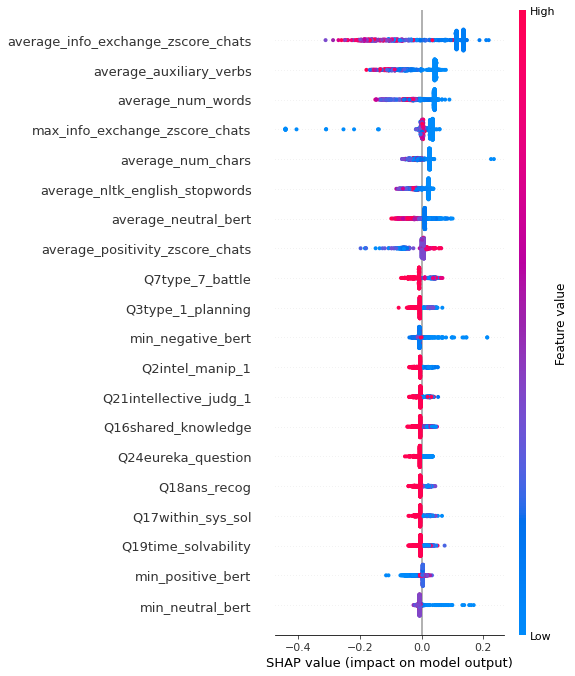

In [4]:
joint_model80 = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], output_dir = '../output/first_80/')
joint_model80.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])
joint_model80.define_model(model_type = 'rf')
joint_model80.evaluate_model(joint_model80.baseline_model, val_size = 0.2, test_size = None)

50% data

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4624	MAE: 0.4861	MSE: 0.5459	RMSE: 0.7389
Validation Set:	R2: 0.1497	MAE: 0.6792	MSE: 0.7951	RMSE: 0.8917


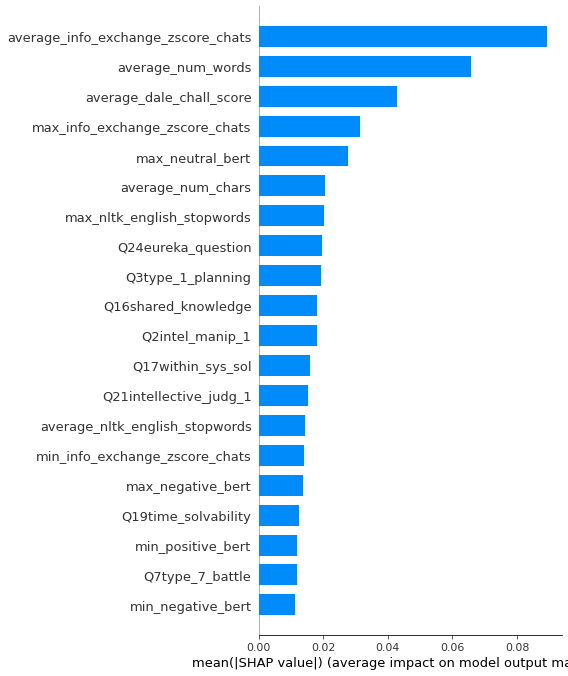

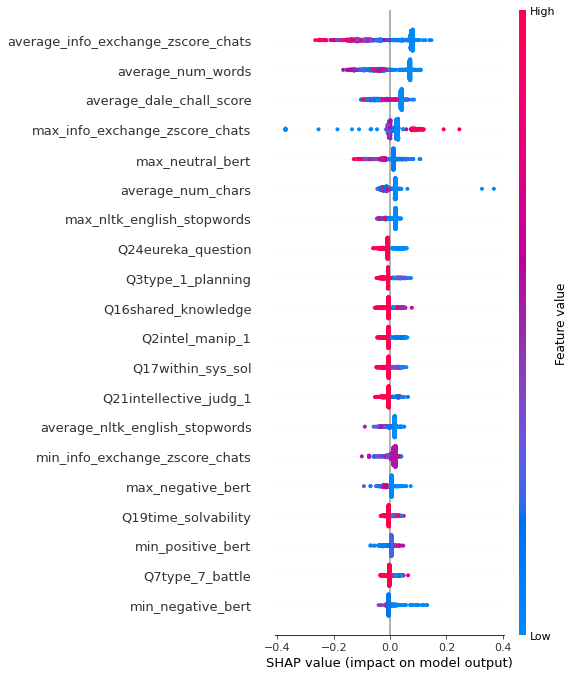

In [5]:
joint_model50 = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], output_dir = '../output/first_50/')
joint_model50.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])
joint_model50.define_model(model_type = 'rf')
joint_model50.evaluate_model(joint_model50.baseline_model, val_size = 0.2, test_size = None)

### Joint Model (standardizing features _between_ tasks)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4634	MAE: 0.4847	MSE: 0.5449	RMSE: 0.7382
Validation Set:	R2: 0.1808	MAE: 0.6606	MSE: 0.766	RMSE: 0.8752


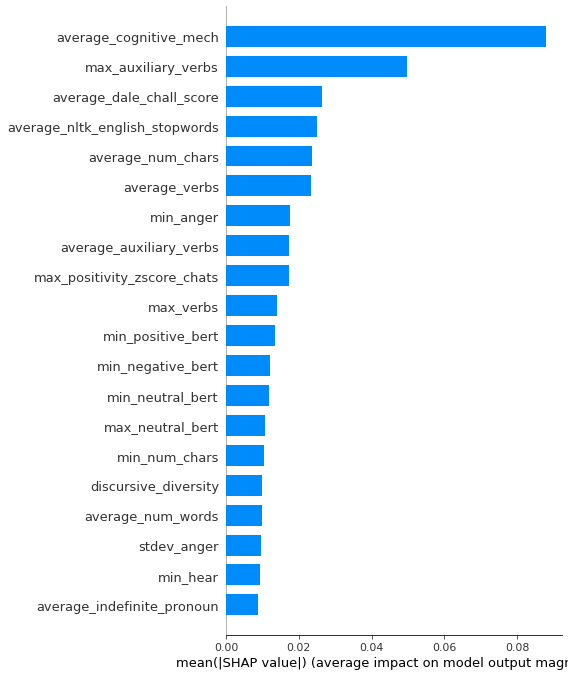

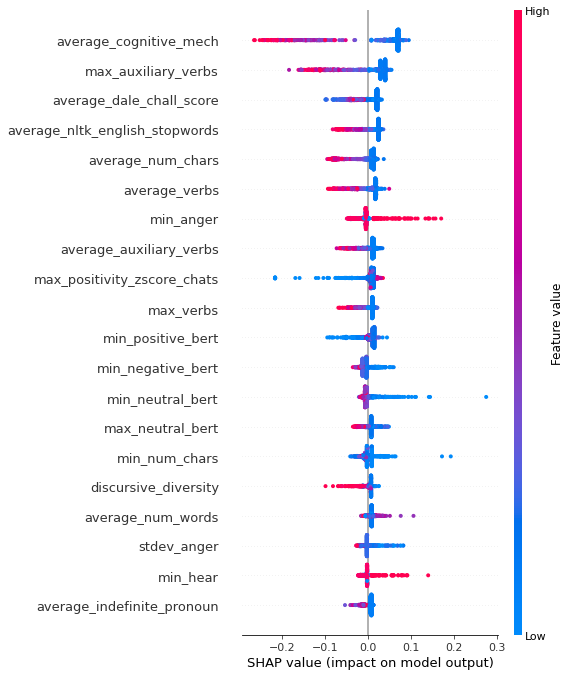

In [6]:
# standardize_within defaults to false, so let's check what happens when we change it to true
joint_model_std_within = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], standardize_within= True)
joint_model_std_within.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])
joint_model_std_within.define_model(model_type = 'rf')
joint_model_std_within.evaluate_model(joint_model_std_within.baseline_model, val_size = 0.2, test_size = None)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4641	MAE: 0.4842	MSE: 0.5442	RMSE: 0.7377
Validation Set:	R2: 0.1674	MAE: 0.6676	MSE: 0.7785	RMSE: 0.8823


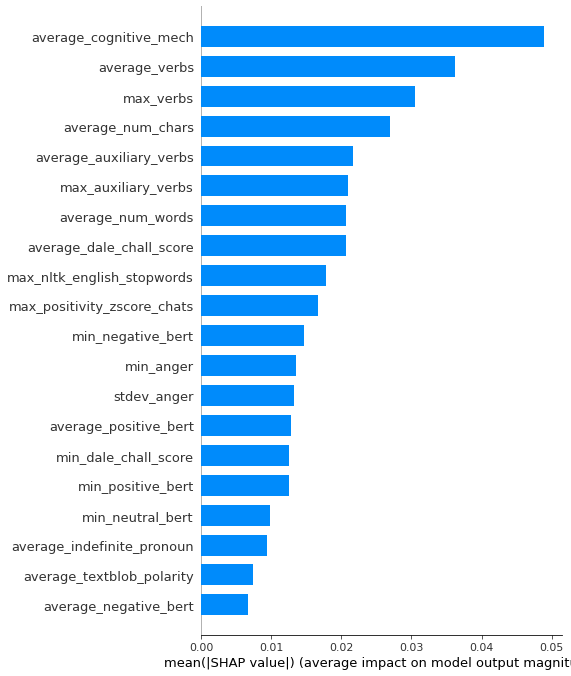

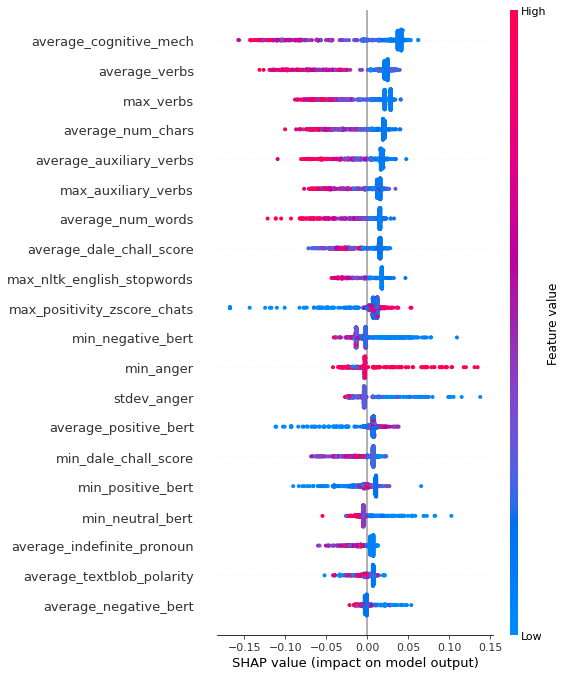

In [7]:
joint_model_std_within80 = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], standardize_within= True, output_dir = '../output/first_80/')
joint_model_std_within80.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])
joint_model_std_within80.define_model(model_type = 'rf')
joint_model_std_within80.evaluate_model(joint_model_std_within80.baseline_model, val_size = 0.2, test_size = None)

Checking Holdout Sets...Creating Holdout Sets...
Done
Training Model...Done
MODEL METRICS
Train Set:	R2: 0.4633	MAE: 0.4843	MSE: 0.5451	RMSE: 0.7383
Validation Set:	R2: 0.163	MAE: 0.6711	MSE: 0.7826	RMSE: 0.8846


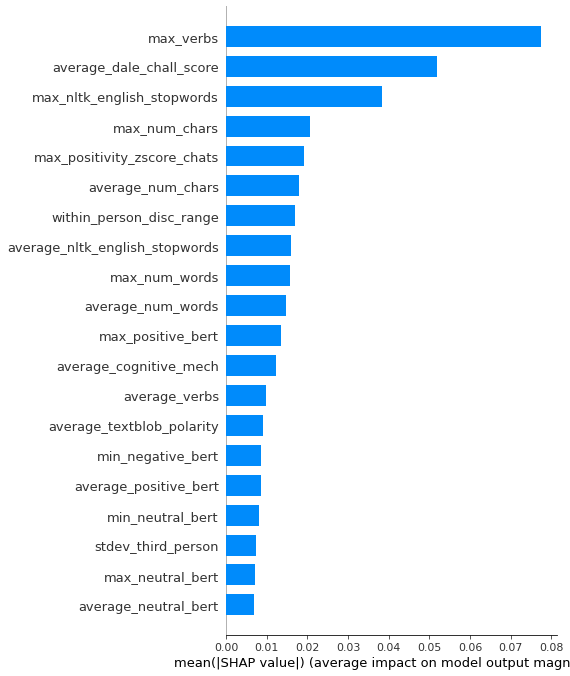

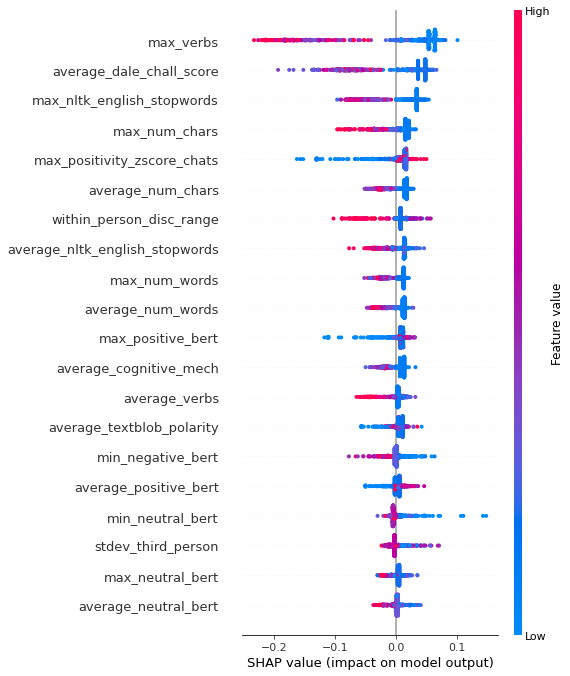

In [8]:
joint_model_std_within50 = ModelBuilder(dataset_names = ["juries", "csop", "csopII", "becker", "dat"], standardize_within= True, output_dir = '../output/first_50/')
joint_model_std_within50.select_target(target=["majority_pct", "zscore_efficiency", "efficiency", "mean_post_discussion_error_pct", "score"])
joint_model_std_within50.define_model(model_type = 'rf')
joint_model_std_within50.evaluate_model(joint_model_std_within50.baseline_model, val_size = 0.2, test_size = None)